<a href="https://colab.research.google.com/github/TottiPuc/Machine_learning/blob/master/Clasificaci%C3%B3n_NN_feedforward_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de imagenes con Redes Neuronales feed-fordwar y KERAS

En este nuevo notebook realizaremos la clasificación de imágenes del banco de datos FashionMNIST publicado por [Zalando research](https://github.com/zalandoresearch/fashion-mnist). Este dataset contiene imágenes de prendas de vestir (jeans, camisas chaquetas, etc.) etiquetadas entre 0 y 9 y que consiste de 60.000 imágenes de entrenamiento y 10.000 imagenes de prueba, donde cada imágen esta en escala de grises con un tamaño de 28x28 pixels.

Importamos nuestra herramienta tensorflow que en su nueva version 2.X ya trae integrado Keras

In [0]:
!pip install tensorflow-gpu==2.0.0-alpha0

Ahora importanmos el resto de nuestras herramientas que nos ayudaran en el proceso de clasificación, es importante resaltar que el dataset FasionMNIST ya viene incorpodaro con KERAS

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

Creamos un objeto para cargar el dataset y posteriormente se carga el dataset que se divide en cuatro conjuntos

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_entrenamiento,y_entrenamiento),(x_teste,y_teste)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print("estructura de los datos de entrenamiento: ", x_entrenamiento.shape)
print("numero de etiquetas unicas de los datos de entrenamiento: ", np.unique(y_entrenamiento))
print("estructura de los datos de teste",x_teste.shape)

estructura de los datos de entrenamiento:  (60000, 28, 28)
numero de etiquetas unicas de los datos de entrenamiento:  [0 1 2 3 4 5 6 7 8 9]
estructura de los datos de teste (10000, 28, 28)


como se puede observaar los datos de entrenamiento contienen 60000 muestras de entrenamiento donde cada una es de 28x28, se tienen 10 etiquetas que van del 0 al 9 y 10 datos de teste de 28x28

Ahora extraemos las nombres de cada etiqueta construyendo un diccionario con la clave nombre y su respectivo valor

In [4]:
class_etiqueta ={i:j for i,j in enumerate(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])}
print(class_etiqueta)



{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


Creamos una funcion para graficar y observar un número de muestras del dataset

In [0]:
def grafica(imagenes, etiquetas, predicciones = None):

    # Creamos una rejilla de 5 * 5
    n_cols = min(5, len(imagenes))
    n_rows = math.ceil(len(imagenes) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize = (n_cols + 3, n_rows + 4))
    
    # verificamos si existen predicciones para graficarlas
    if predicciones is None:
        predicciones = [None] * len(etiquetas)
        
    # recorremos los datos para imprimirlos en e plot
    for i, (x, y_real, y_pred) in enumerate(zip(imagenes, etiquetas, predicciones)):
        ax = axes.flat[i]
        ax.imshow(x, cmap = plt.cm.binary)
        
        # Imprime el valor real (y)
        ax.set_title(f"L: {class_etiqueta[y_real]}")
        
        # Imprime la prediccion del modelo (y_pred)
        if y_pred is not None:
            ax.set_xlabel(f"Prev: {class_etiqueta[y_pred]}")
    
        ax.set_xticks([])
        ax.set_yticks([])

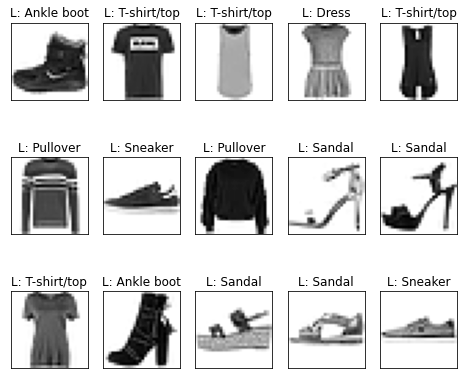

In [6]:
grafica(x_entrenamiento[:15],y_entrenamiento[:15])

Ahora normalizamos las imagenes para que todo quede entre 0 y 1 que es lo adecuado cuadno se trabaj con procesamiento de imagenes una de las formas ms adecuadas es dividir cada imagen por su valor máximo en este caso 255 que es el valor mas alto de un pixel en escala de grises

In [7]:
x_entrenamiento = x_entrenamiento/255.0
x_teste = x_teste / 255.0
print(x_entrenamiento.shape)
print(x_teste.shape)

(60000, 28, 28)
(10000, 28, 28)


El proximo paso es crear la red neuronal con Keras

In [0]:
modelo = keras.Sequential(layers=[
         keras.layers.Flatten(input_shape=(28,28)),  # esta primera capa de la red lo que hace es crear un solo vector para ser presentado a la entrada es decir se concatena una fila despues de la otra quedando en una matriz de 1X(28x28)
         keras.layers.Dense(128, activation="relu"), # esta segunda capa  tiene 128 neurones que tienen una función de activacion relu para hacer los calculos matemáticos
         keras.layers.Dense(10,activation="softmax") # la última camada contiene 10 neuronas por que se tiene 10 clases osea una neurona para cada clase
])

Finalmente realizamos una optimización del modelo, esto es calculamos los errores que entrega el modelo con las etiquetas correspondientes y dependiendo de la probabilida de salida que entregar en la ultima capa gracias a la función softmax, aplicamos una métrica que caulcule esa distancia o error entre las la imagen original y lo que aprendio.

En este caso utilizaremos la funcion de perdida de *entropica cruzada* que es ampliamente usada en reconocimiento de imagenes en escala de grises y para poder actualizar los pesos se usara una función evolucionada del gradiente descendiente llamada *adam*. Todo esto en una sola linea de codigo gracias a KERAS




In [0]:
modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

La última métrica llamada accuracy es usada para evaluar y dar un porcentaje de acierto de nuestra calificacion

Con nuestro modelo y su estructura de optimización creada solo resta entrenarlo para ver como se comporta y que tal se ajusta a los datos presentados par eso usaremos la función fit dentro del objeto modelo.

la primera parte de esta linea de codigo recibe los datos de entrenamiento previamente normalizados y sus respectivas etiquetas, despues de todo estamos entrenando supervisadamente, la variable *batch_size* le esta diciendo al modelo que solo va a cargar un lote pequeño de entrenamiento se hace esto para no sobrecarcar la memoria del computador se entrena por lotes de otra forma deberiamos cargar las 60000 imágenes de golpe al computador algo que no serai eficiente, el número de epocas sera el numero de pasadas que dara durante el entrenamiento en cada lote de 60 imágenes y finalmente la variable *validation_split* lo que hace es que durante el entrenamiento separa en este caso 20 % de los datos para ir viendo el rendimiento es como si se estuvieras haciendo un teste durante el entrenamiento.



In [10]:
modelo.fit(x_entrenamiento,y_entrenamiento,batch_size=60, epochs=10,validation_split=0.2)

Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: 0.5401 - accuracy: 0.8122 - val_loss: 0.4456 - val_accuracy: 0.8457
Epoch 2/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4021 - accuracy: 0.8574 - val_loss: 0.3818 - val_accuracy: 0.8637
Epoch 3/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3604 - accuracy: 0.8696 - val_loss: 0.4044 - val_accuracy: 0.8547
Epoch 4/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3336 - accuracy: 0.8789 - val_loss: 0.3464 - val_accuracy: 0.8769
Epoch 5/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3152 - accuracy: 0.8851 - val_loss: 0.3443 - val_accuracy: 0.8763
Epoch 6/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3007 - accuracy: 0.8901 - val_loss: 0.3370 - val_accuracy: 0.8791
Epoch 7/10
800/800 [==============================] - 2s 2ms/step - loss: 0.2851 - accuracy: 0.8947 - val_loss: 0.3633 - val_accuracy: 0.8682
Epoch 

Con el modelo ya enternado y ajustado correctamente se hace la evaluación con los datos reales de teste y para eso usamos el metodo evaluate.el cual recibe las imagenes de teste con sus respectivas etiquetas a fin de realizar los calculos de accuracy finales 

In [11]:
perdida, acierto = modelo.evaluate(x_teste,y_teste)
print(f"La tasa de acierto del modelo es = {acierto*100:.2f} %")

313/313 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8735
La tasa de acierto del modelo es = 87.35 %


Realizamos unas predicciones

In [12]:
print(modelo.predict_classes(x_teste))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[9 2 1 ... 8 1 5]


grabamos los datos para poderlos graficar

In [0]:
predicciones = modelo.predict_classes(x_teste)
#generamos indices randomicos para seleccionar aleatoriamente imagenes y ver como nuestro modelo predijo en este caso solo elijiremos los primeros 20 numeros aleatorios
rand_index = np.random.permutation(len(x_teste))[:20]

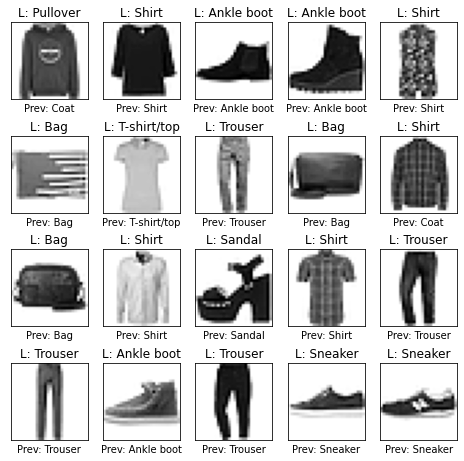

In [14]:
# y graficamos en la funcion graficar previamente desarrollada
grafica(x_teste[rand_index],y_teste[rand_index],predicciones[rand_index])